In [261]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt
%matplotlib inline

In [262]:
df = pd.read_excel(
    "../data/2021-07-07 Financial servcies dataset - Anon - Static for clustering.xlsx",
    sheet_name="monthly_summary")

In [263]:
df.head()

,ID,CREATED_ON,LAST_LOGIN,SECONDARY_ID,ORG_NAME,SERVICE_X_DATE,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,PACKAGE_TYPE,PREVIOUS_PACKAGE_TYPE,PACKAGE_CHANGE_DATE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,SUPERUSER_LAST_LOGIN,ACCOUNTANT_ID,ACCOUNTANT_LAST_LOGIN,GROSS_INCOME,STATUS_CODE,RATING_CODE,INCOME_RANGE_CODE,RISK_CATEGORY
0,233823894,2017-03-22 14:30:00,2017-03-22 14:30:54,20441.0,Company 1,NaT,1191.0,49414.0,91406695.0,Free_tier_0,Free_tier_0,2020-10-26 11:48:21.700,0.0,0.0,0.0,0.0,233823893.0,2018-01-15 06:49:25,NaN,NaT,91107.0,91406700.0,4.0,NaN,NaN
1,233823896,2017-03-23 12:48:00,2017-03-23 12:48:31,20443.0,Company 2,NaT,1117.0,NaN,91406690.0,Free_tier_0,Free_tier_0,2020-10-26 11:48:21.700,0.0,0.0,0.0,0.0,233823895.0,2019-01-07 09:52:02,NaN,NaT,2129059.0,91406700.0,1.0,NaN,NaN
2,233823898,2017-03-23 13:46:00,2017-03-23 15:19:06,20445.0,Company 3,NaT,1123.0,70224.0,91406692.0,Free_tier_0,Free_tier_0,2020-10-26 11:48:21.700,0.0,0.0,0.0,0.0,233823897.0,2018-01-15 06:49:26,NaN,NaT,39062.0,91406700.0,2.0,NaN,NaN
3,233823900,2017-03-27 06:40:00,2017-03-27 06:44:06,20447.0,Company 4,NaT,2600.0,81104.0,91406694.0,Free_tier_0,Free_tier_0,2020-10-26 11:48:21.700,0.0,0.0,0.0,0.0,233823899.0,2018-01-15 06:49:26,NaN,NaT,60177.0,91406700.0,1.0,NaN,NaN
4,233823901,2017-03-27 06:43:00,2017-03-27 06:46:13,20448.0,Company 5,NaT,1016.0,46514.0,91406695.0,Free_tier_0,Free_tier_0,2020-10-26 11:48:21.700,0.0,0.0,0.0,0.0,NaN,NaT,NaN,NaT,NaN,91406713.0,NaN,NaN,NaN


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27597 entries, 0 to 27596
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     27597 non-null  int64         
 1   CREATED_ON             27597 non-null  datetime64[ns]
 2   LAST_LOGIN             27361 non-null  datetime64[ns]
 3   SECONDARY_ID           27589 non-null  float64       
 4   ORG_NAME               27597 non-null  object        
 5   SERVICE_X_DATE         7335 non-null   datetime64[ns]
 6   POSTCODE               21588 non-null  float64       
 7   LINE_OF_BUSINESS       20734 non-null  float64       
 8   SIZE_CODE              21588 non-null  float64       
 9   PACKAGE_TYPE           27492 non-null  object        
 10  PREVIOUS_PACKAGE_TYPE  26371 non-null  object        
 11  PACKAGE_CHANGE_DATE    26371 non-null  datetime64[ns]
 12  SERVICE_1_COUNT        27517 non-null  float64       
 13  S

In [265]:
df.describe()

,ID,SECONDARY_ID,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,ACCOUNTANT_ID,GROSS_INCOME,STATUS_CODE,RATING_CODE,INCOME_RANGE_CODE,RISK_CATEGORY
count,2.759700e+04,27589.000000,21588.000000,20734.000000,2.158800e+04,27517.000000,27517.000000,27517.000000,27517.000000,1.688600e+04,1.237000e+03,1.920300e+04,2.159300e+04,20761.000000,437.000000,4329.000000
mean,4.476408e+08,79318.251876,4179.890865,55281.344844,9.140669e+07,16.538722,1.094523,34.157648,16.089327,4.427456e+08,4.437675e+08,5.675636e+05,9.140670e+07,2.157266,1.173913,4.276276
std,1.239480e+08,19413.902735,2893.956864,18696.544157,5.153014e+00,208.380814,41.456683,373.561266,168.076891,1.179662e+08,1.545328e+08,7.618814e+06,1.641331e+00,0.927048,0.568239,2.408855
min,2.338238e+08,1000.000000,1007.000000,10114.000000,9.140668e+07,0.000000,0.000000,0.000000,0.000000,2.338238e+08,2.338241e+08,-3.470000e+02,9.140670e+07,1.000000,0.000000,1.000000
25%,3.911867e+08,65607.000000,1196.000000,43344.000000,9.140669e+07,0.000000,0.000000,0.000000,0.000000,3.982153e+08,3.342457e+08,1.551250e+04,9.140670e+07,1.000000,1.000000,2.000000
50%,4.405768e+08,80256.000000,3200.000000,49414.000000,9.140669e+07,0.000000,0.000000,0.000000,0.000000,4.381757e+08,4.110720e+08,6.640500e+04,9.140670e+07,2.000000,1.000000,4.000000
75%,4.960891e+08,94953.000000,6924.250000,69204.000000,9.140670e+07,0.000000,0.000000,0.000000,0.000000,4.693606e+08,5.802361e+08,2.443620e+05,9.140670e+07,3.000000,1.000000,6.000000
max,7.867859e+08,111086.000000,9970.000000,99004.000000,9.140670e+07,10865.000000,5275.000000,49968.000000,8294.000000,7.867706e+08,7.867859e+08,5.230794e+08,9.140672e+07,4.000000,5.000000,9.000000


In [266]:
print(df.columns)

Index(['ID', 'CREATED_ON', 'LAST_LOGIN', 'SECONDARY_ID', 'ORG_NAME',
       'SERVICE_X_DATE', 'POSTCODE', 'LINE_OF_BUSINESS', 'SIZE_CODE',
       'PACKAGE_TYPE', 'PREVIOUS_PACKAGE_TYPE', 'PACKAGE_CHANGE_DATE',
       'SERVICE_1_COUNT', 'SERVICE_2_COUNT', 'SERVICE_2_TOTAL',
       'SERVICE_3_COUNT', 'SUPERUSER_ID', 'SUPERUSER_LAST_LOGIN',
       'ACCOUNTANT_ID', 'ACCOUNTANT_LAST_LOGIN', 'GROSS_INCOME', 'STATUS_CODE',
       'RATING_CODE', 'INCOME_RANGE_CODE', 'RISK_CATEGORY'],
      dtype='object')


In [267]:
print(len(df))
for col in df.columns:
    uvals = df[col].unique()
    print(col)
    print(len(uvals))
    if len(uvals) < 50:
        print(uvals)
    print()

27597
ID
27503

CREATED_ON
25280

LAST_LOGIN
27214

SECONDARY_ID
27496

ORG_NAME
27597

SERVICE_X_DATE
7243

POSTCODE
1978

LINE_OF_BUSINESS
475

SIZE_CODE
19
[91406695. 91406690. 91406692. 91406694. 91406683.       nan 91406697.
 91406693. 91406696. 91406698. 91406688. 91406682. 91406685. 91406699.
 91406687. 91406684. 91406689. 91406686. 91406691.]

PACKAGE_TYPE
11
['Free_tier_0' 'Hibernated' 'paid_tier_1' 'paid_tier_2' 'Hibernated_2'
 'Freemium' 'Free_tier_1' nan 'Free_tier_2' 'Free_tier_3'
 'Free_tier_promo']

PREVIOUS_PACKAGE_TYPE
14
['Free_tier_0' 'Hibernated' 'paid_tier_1' 'S' 'paid_tier_2' 'Hibernated_2'
 'Freemium' 'M' 'Free_tier_1' 'Free_tier_2' nan 'ExleX' 'Free_tier_3'
 'Free_tier_promo']

PACKAGE_CHANGE_DATE
206

SERVICE_1_COUNT
461

SERVICE_2_COUNT
94

SERVICE_2_TOTAL
770

SERVICE_3_COUNT
506

SUPERUSER_ID
16809

SUPERUSER_LAST_LOGIN
16602

ACCOUNTANT_ID
1236

ACCOUNTANT_LAST_LOGIN
1236

GROSS_INCOME
16631

STATUS_CODE
11
[91406700. 91406713.       nan 91406701. 91406705.

In [268]:
df["ORG_NAME"]

0            Company 1
1            Company 2
2            Company 3
3            Company 4
4            Company 5
             ...      
27592    Company 27593
27593    Company 27594
27594    Company 27595
27595    Company 27596
27596    Company 27597
Name: ORG_NAME, Length: 27597, dtype: object

The `ORG_NAME` is just a unique identifier of each row (in the form of `"Company #"`), it does not contain any useful information, so we can drop it.

In [269]:
df.drop(["ORG_NAME"], axis=1, inplace=True)

In [270]:
print(f'{round(df["INCOME_RANGE_CODE"].isna().sum() / len(df) * 100, 2)} % of INCOME_RANGE_CODE is missing')
print(f'{round(df["RISK_CATEGORY"].isna().sum() / len(df) * 100, 2) } % of RISK_CATEGORY is missing')

98.42 % of INCOME_RANGE_CODE is missing
84.31 % of RISK_CATEGORY is missing


Although a lot of values are missing from these columns, those that are filled in with the same value can be considered more similar, which might be useful for the clustering task. Unfortunately we can't say anything about those that are empty, and since there are so many rows where this information is not present, it is better if we drop these columns.

In [271]:
df.drop(["INCOME_RANGE_CODE", "RISK_CATEGORY"], axis=1, inplace=True)

In [272]:
df[df.duplicated(subset=["ID"], keep=False)]

,ID,CREATED_ON,LAST_LOGIN,SECONDARY_ID,SERVICE_X_DATE,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,PACKAGE_TYPE,PREVIOUS_PACKAGE_TYPE,PACKAGE_CHANGE_DATE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,SUPERUSER_LAST_LOGIN,ACCOUNTANT_ID,ACCOUNTANT_LAST_LOGIN,GROSS_INCOME,STATUS_CODE,RATING_CODE
141,251688270,2018-03-01 13:35:00,2021-07-06 11:33:55,56017.0,2018-03-01 13:36:34,1089.0,70224.0,91406692.0,paid_tier_2,paid_tier_2,2020-10-26 11:48:21.700,683.0,2.0,38.0,1035.0,251688269.0,2021-01-19 14:13:44,NaN,NaT,205000.0,91406700.0,3.0
142,251688270,2018-03-01 13:35:00,2021-07-06 11:33:55,56017.0,2018-03-01 13:36:34,1089.0,70224.0,91406692.0,paid_tier_2,paid_tier_2,2020-10-26 11:48:21.700,683.0,2.0,38.0,1035.0,456224322.0,2021-07-02 17:30:08,NaN,NaT,205000.0,91406700.0,3.0
172,251701813,2018-03-02 11:20:00,2021-04-26 17:11:19,56069.0,2018-03-02 11:20:53,NaN,NaN,NaN,paid_tier_2,paid_tier_2,2020-10-26 11:48:21.700,0.0,0.0,3758.0,346.0,251701812.0,2021-07-06 04:54:06,582533521.0,2021-01-17 12:42:22,NaN,NaN,NaN
173,251701813,2018-03-02 11:20:00,2021-04-26 17:11:19,56069.0,2018-03-02 11:20:53,NaN,NaN,NaN,paid_tier_2,paid_tier_2,2020-10-26 11:48:21.700,0.0,0.0,3758.0,346.0,251701812.0,2021-07-06 04:54:06,581226382.0,2020-08-18 13:16:46,NaN,NaN,NaN
281,240606399,2018-01-18 10:15:00,2021-07-06 10:51:29,43697.0,2018-08-02 13:34:59,8500.0,61104.0,91406694.0,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,2181.0,1.0,276.0,1450.0,240606398.0,2021-07-06 18:48:02,251701791.0,2019-04-09 16:01:26,134137.0,91406700.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25927,546711143,2019-11-28 10:20:00,2021-06-28 18:45:36,98438.0,2019-11-28 10:23:54,NaN,NaN,NaN,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,27.0,1.0,13.0,60.0,546711142.0,2021-07-06 00:31:56,569077891.0,2021-06-08 09:50:29,NaN,NaN,NaN
26662,621770714,2020-06-02 19:05:00,2021-07-05 14:42:52,103728.0,2020-06-02 19:30:34,1124.0,59114.0,91406683.0,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,0.0,0.0,51.0,0.0,621770713.0,2021-07-06 00:12:59,683587439.0,2021-03-03 09:11:00,NaN,91406700.0,3.0
26663,621770714,2020-06-02 19:05:00,2021-07-05 14:42:52,103728.0,2020-06-02 19:30:34,1124.0,59114.0,91406683.0,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,0.0,0.0,51.0,0.0,621770713.0,2021-07-06 00:12:59,739049620.0,2021-07-05 14:44:58,NaN,91406700.0,3.0
27090,650687287,2020-08-04 10:00:00,2021-07-02 15:17:32,105946.0,2020-08-04 10:03:45,2040.0,47914.0,91406692.0,Freemium,Freemium,2020-10-26 11:48:21.700,38.0,6.0,18.0,25.0,650687286.0,2021-07-02 15:47:42,493341746.0,2021-06-18 07:33:58,NaN,91406700.0,3.0


We have a bunch of interestingly duplicated rows. If the record with the a given `ID` (or `SECONDARY_ID`) got accessed by two different super users or accountants (`SUPERUSER_ID` and `ACCOUNTANT_ID`), then the row got duplicated with the same `ID` and contents. The only difference between the duplicated rows is either the `SUPERUSER_ID` or `ACCOUNTANT_ID`. These duplicates could introduce doubious behaviour into a clustering algorithm, so we will only keep the rows with the most recent logins.

In [273]:
df[df.duplicated(subset=["ID"], keep="last")]

,ID,CREATED_ON,LAST_LOGIN,SECONDARY_ID,SERVICE_X_DATE,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,PACKAGE_TYPE,PREVIOUS_PACKAGE_TYPE,PACKAGE_CHANGE_DATE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,SUPERUSER_LAST_LOGIN,ACCOUNTANT_ID,ACCOUNTANT_LAST_LOGIN,GROSS_INCOME,STATUS_CODE,RATING_CODE
141,251688270,2018-03-01 13:35:00,2021-07-06 11:33:55,56017.0,2018-03-01 13:36:34,1089.0,70224.0,91406692.0,paid_tier_2,paid_tier_2,2020-10-26 11:48:21.700,683.0,2.0,38.0,1035.0,251688269.0,2021-01-19 14:13:44,NaN,NaT,205000.0,91406700.0,3.0
172,251701813,2018-03-02 11:20:00,2021-04-26 17:11:19,56069.0,2018-03-02 11:20:53,NaN,NaN,NaN,paid_tier_2,paid_tier_2,2020-10-26 11:48:21.700,0.0,0.0,3758.0,346.0,251701812.0,2021-07-06 04:54:06,582533521.0,2021-01-17 12:42:22,NaN,NaN,NaN
281,240606399,2018-01-18 10:15:00,2021-07-06 10:51:29,43697.0,2018-08-02 13:34:59,8500.0,61104.0,91406694.0,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,2181.0,1.0,276.0,1450.0,240606398.0,2021-07-06 18:48:02,251701791.0,2019-04-09 16:01:26,134137.0,91406700.0,1.0
282,240606399,2018-01-18 10:15:00,2021-07-06 10:51:29,43697.0,2018-08-02 13:34:59,8500.0,61104.0,91406694.0,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,2181.0,1.0,276.0,1450.0,240606398.0,2021-07-06 18:48:02,341588414.0,2019-05-16 19:31:31,134137.0,91406700.0,1.0
489,346780713,2018-06-22 16:57:00,2021-07-06 12:41:08,60870.0,2018-06-22 17:00:13,1158.0,49414.0,91406695.0,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,0.0,0.0,641.0,22.0,346780712.0,2021-07-05 23:20:22,657349444.0,2021-02-12 20:26:38,69862.0,91406700.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25564,608992300,2020-05-04 07:40:00,2021-07-06 14:57:40,102787.0,2020-05-04 07:44:23,1064.0,52294.0,91406693.0,paid_tier_2,paid_tier_2,2020-10-26 11:48:21.700,156.0,6.0,656.0,167.0,608992299.0,2021-07-06 14:58:10,643632459.0,2021-07-01 11:17:26,22807.0,91406700.0,1.0
25734,644839159,2020-07-17 12:51:00,2021-05-20 10:14:28,105690.0,2020-07-17 15:03:47,1143.0,47914.0,91406682.0,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,0.0,0.0,0.0,0.0,644839158.0,2021-06-17 18:34:07,767004039.0,2021-05-20 10:43:23,NaN,91406700.0,3.0
25926,546711143,2019-11-28 10:20:00,2021-06-28 18:45:36,98438.0,2019-11-28 10:23:54,NaN,NaN,NaN,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,27.0,1.0,13.0,60.0,546711142.0,2021-07-06 00:31:56,240613405.0,2020-01-09 11:24:45,NaN,NaN,NaN
26662,621770714,2020-06-02 19:05:00,2021-07-05 14:42:52,103728.0,2020-06-02 19:30:34,1124.0,59114.0,91406683.0,paid_tier_1,paid_tier_1,2020-10-26 11:48:21.700,0.0,0.0,51.0,0.0,621770713.0,2021-07-06 00:12:59,683587439.0,2021-03-03 09:11:00,NaN,91406700.0,3.0


In [274]:
df.duplicated(subset=["ID"], keep="last")

0        False
1        False
2        False
3        False
4        False
         ...  
27592    False
27593    False
27594    False
27595    False
27596    False
Length: 27597, dtype: bool

In [275]:
df.drop(df[df.duplicated(subset=["ID"], keep="last")].index, inplace=True)

In [276]:
print(len(df[df.duplicated(subset=["ID"], keep=False)]))
print(f'{len(df["ID"].unique())} / {len(df)}')

0
27503 / 27503


Since now the `ID` column is completely unique, it does not contain any information that would help us in clustering the instances. We can drop it.

In [277]:
df.drop(["ID"], axis=1, inplace=True)

We should also check the `SECONDARY_ID` column.

In [278]:
print(f'{len(df["SECONDARY_ID"].unique())} / {len(df)}')

27496 / 27503


In [279]:
df[df.duplicated(subset=["SECONDARY_ID"], keep=False)]

,CREATED_ON,LAST_LOGIN,SECONDARY_ID,SERVICE_X_DATE,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,PACKAGE_TYPE,PREVIOUS_PACKAGE_TYPE,PACKAGE_CHANGE_DATE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,SUPERUSER_LAST_LOGIN,ACCOUNTANT_ID,ACCOUNTANT_LAST_LOGIN,GROSS_INCOME,STATUS_CODE,RATING_CODE
822,1970-01-01 00:00:00,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
1246,1970-01-01 00:00:00,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
2548,2016-08-22 13:31:00,2017-04-06 08:51:20,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
3542,2019-01-18 10:27:00,2019-01-18 10:51:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
8352,2019-03-28 14:07:00,2019-11-06 11:34:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
9335,2019-01-08 17:43:00,2019-01-08 18:36:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
17447,2019-03-28 13:45:00,2019-11-06 12:44:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN
24529,2019-11-06 08:23:00,2019-11-06 09:02:00,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN


In this case, we have 8 rows where the `SECONDARY_ID` is missing. These records are baseically empty, we will remove them, but first we need to make sure that there are no more of these.

In [280]:
[(i, len(df[df.isna().sum(axis=1) > i])) for i in range(len(df.columns))]

[(0, 26869),
 (1, 26662),
 (2, 22914),
 (3, 14998),
 (4, 13807),
 (5, 7791),
 (6, 6542),
 (7, 5988),
 (8, 4822),
 (9, 3055),
 (10, 2916),
 (11, 362),
 (12, 330),
 (13, 80),
 (14, 76),
 (15, 73),
 (16, 73),
 (17, 73),
 (18, 70),
 (19, 2),
 (20, 0)]

It turns out, that there are a lot of rows with 10 missing values, after that there is an order of magnitute decrease with rows having 11+ missing values. Another big decrease happens after 13 missing values.

In [281]:
df[df.isna().sum(axis=1) > 13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 192 to 27491
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CREATED_ON             80 non-null     datetime64[ns]
 1   LAST_LOGIN             12 non-null     datetime64[ns]
 2   SECONDARY_ID           72 non-null     float64       
 3   SERVICE_X_DATE         0 non-null      datetime64[ns]
 4   POSTCODE               0 non-null      float64       
 5   LINE_OF_BUSINESS       0 non-null      float64       
 6   SIZE_CODE              0 non-null      float64       
 7   PACKAGE_TYPE           4 non-null      object        
 8   PREVIOUS_PACKAGE_TYPE  0 non-null      object        
 9   PACKAGE_CHANGE_DATE    0 non-null      datetime64[ns]
 10  SERVICE_1_COUNT        4 non-null      float64       
 11  SERVICE_2_COUNT        4 non-null      float64       
 12  SERVICE_2_TOTAL        4 non-null      float64       
 13  SE

In [282]:
df[df.isna().sum(axis=1) > 13].describe()

,SECONDARY_ID,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,ACCOUNTANT_ID,GROSS_INCOME,STATUS_CODE,RATING_CODE
count,72.000000,0.0,0.0,0.0,4.0,4.0,4.0,4.0,0.0,0.0,3.000000,3.0,3.0
mean,43953.958333,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,167254.666667,91406700.0,2.0
std,27670.888730,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,168582.041681,0.0,1.0
min,1000.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,5950.000000,91406700.0,1.0
25%,32840.750000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,79744.000000,91406700.0,1.5
50%,32860.500000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,153538.000000,91406700.0,2.0
75%,32879.250000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,247907.000000,91406700.0,2.5
max,110916.000000,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,342276.000000,91406700.0,3.0


Since there is still some information intact with 13 missing values we decided to cut the missing number at 15, anything above that will be dropped.

In [283]:
df.drop(df[df.isna().sum(axis=1) > 13].index, inplace=True)

Now if we check back to the `SECONDARY_ID` column, there are no more duplicates (or missing values), which means we can drop this column as well, since there is no information that would benefit the clustering.

In [284]:
print(f'{len(df["SECONDARY_ID"].unique())} / {len(df)}')
df[df.duplicated(subset=["SECONDARY_ID"], keep=False)]


27423 / 27423


,CREATED_ON,LAST_LOGIN,SECONDARY_ID,SERVICE_X_DATE,POSTCODE,LINE_OF_BUSINESS,SIZE_CODE,PACKAGE_TYPE,PREVIOUS_PACKAGE_TYPE,PACKAGE_CHANGE_DATE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,SUPERUSER_LAST_LOGIN,ACCOUNTANT_ID,ACCOUNTANT_LAST_LOGIN,GROSS_INCOME,STATUS_CODE,RATING_CODE


In [285]:
df.drop("SECONDARY_ID", axis=1, inplace=True)

In [286]:
print(f'{len(df["SUPERUSER_ID"].unique())} / {df["SUPERUSER_ID"].notna().sum()}')
print(f'{len(df["ACCOUNTANT_ID"].unique())} / {df["ACCOUNTANT_ID"].notna().sum()}')


16800 / 16800
1151 / 1150


Since both `SUPERUSER_ID` and `ACCOUNTANT_ID` contain only unique values (or missing values) the only information we can extract is whether or not there is an ID or it is missing. We can transform the columns into binary values.

In [287]:
df.loc[df["SUPERUSER_ID"].notna(), "SUPERUSER_ID"] = 1
df["SUPERUSER_ID"].fillna(0, inplace=True)

df.loc[df["ACCOUNTANT_ID"].notna(), "ACCOUNTANT_ID"] = 1
df["ACCOUNTANT_ID"].fillna(0, inplace=True)

print(df["SUPERUSER_ID"].unique())
print(df["ACCOUNTANT_ID"].unique())

[1. 0.]
[0. 1.]


We examined two approaches for handling datetime type data. 

The first idea was to transform the dates to numerical values in a 0-1 range. This did not yield good results as we will later see. 

The other approach is to threshold (or bin) the dates. This way we can assign binary (or categorical) values instead.

In [288]:
cols = df.select_dtypes("datetime64[ns]").columns
print(df[cols].min().min())
print(df[cols].max().max())

2016-12-19 16:52:00
2021-07-07 00:26:39.877000


In [289]:
new_cols = [f"{c}_ACTIVE" for c in cols]
df[new_cols] = df[cols] > np.datetime64("2020-01-01")

In [290]:
df[cols] = (df[cols] - df[cols].min().min()) / np.timedelta64(1, "ns")
df[cols] = df[cols] / df[cols].max().max()

It is also crucial to handle categorical variables properly. Since one of the variable (`LINE_OF_BUSINESS`) has more than 400 distinct categories, it is not a possible to create a one-hot-encoding from them. Instead, (for now at least) we will convert the nominal categorical variables to a string representation (`LINE_OF_BUSINESS`, `SIZE_CODE`, `STATUS_CODE`) and keep the ones with ordinal values as is (`RATING_CODE`). (These might need some changes in the future.) Since we are using a csv file to save the data, we will need to convert to string again uppon loading back the cleaned data, since csv does not carry metadata over. The final non-continues variable that needs to be addressed is the `POSTCODE`.

In [291]:
df[["LINE_OF_BUSINESS", "SIZE_CODE", "STATUS_CODE"]] = df[["LINE_OF_BUSINESS", "SIZE_CODE", "STATUS_CODE"]].astype("str")

To make the `POSTCODE` more managable, we will transform them to the County they are in, to get - although lower resolution - information resembling categories. For this we will use an [external data source](https://docs.google.com/spreadsheets/d/1mwS_Gbu5UsXG8a2aIuGUCESo67qZfZMTyFcZd2pNLtk/edit#gid=0) that list the Hungarian postcodes with cities and counties they are in.

In [292]:
postcode_df = pd.read_csv("../data/Magyarországi település, irányítószám, ksh településazonosító törzsszám, megye db - Sheet 1.csv", usecols=["Irányítószám", "Megye név"])
postcode2county = {postcode : county for postcode, county in postcode_df.values}

In [293]:
df["COUNTY"] = df["POSTCODE"].apply(lambda x: postcode2county[x] if x in postcode2county else np.nan)
df.drop(["POSTCODE"], axis=1, inplace=True)

Before we can noremize the data, it is crucial to remove the outliers. Without this, the majority of data will be clustered together, since the outliers dominate the range of the numerical values.

In [294]:
print(df.var(axis=0))

CREATED_ON                      3.308916e-02
LAST_LOGIN                      6.382730e-02
SERVICE_X_DATE                  4.267207e-02
PACKAGE_CHANGE_DATE             2.828848e-04
SERVICE_1_COUNT                 3.764819e+04
SERVICE_2_COUNT                 1.703856e+03
SERVICE_2_TOTAL                 1.334976e+05
SERVICE_3_COUNT                 2.702326e+04
SUPERUSER_ID                    2.373244e-01
SUPERUSER_LAST_LOGIN            2.524638e-02
ACCOUNTANT_ID                   4.017847e-02
ACCOUNTANT_LAST_LOGIN           6.825973e-02
GROSS_INCOME                    5.826392e+13
RATING_CODE                     8.599358e-01
CREATED_ON_ACTIVE               1.485103e-01
LAST_LOGIN_ACTIVE               2.460773e-01
SERVICE_X_DATE_ACTIVE           4.815269e-02
PACKAGE_CHANGE_DATE_ACTIVE      4.007823e-02
SUPERUSER_LAST_LOGIN_ACTIVE     2.487823e-01
ACCOUNTANT_LAST_LOGIN_ACTIVE    2.766966e-02
dtype: float64


C:\Users\anonym\AppData\Local\Temp/ipykernel_8344/2657021208.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var(axis=0))


In [295]:
def detect_outliers(col:pd.Series, i:int = 3):
    return np.abs(col - col.mean()) > i * col.std()

In [296]:
def plot_outliers(col:pd.Series, logscale:bool = False):
    plt.figure(figsize=(20, 20), dpi=80)
    ax1 = plt.subplot(2, 2, 1)
    ax1.boxplot(col[~np.isnan(col)])
    if logscale: plt.yscale("log")

    outliers = detect_outliers(col)
    ax2 = plt.subplot(2, 2, 2)
    ax2.boxplot(col[~outliers & ~np.isnan(col)])
    if logscale: plt.yscale("log")

    ax3 = plt.subplot(2, 2, 3)
    ax3.hist(col[~np.isnan(col)])
    if logscale: plt.yscale("log")

    ax4 = plt.subplot(2, 2, 4)
    ax4.hist(col[~outliers & ~np.isnan(col)])
    if logscale: plt.yscale("log")
    
    print(np.count_nonzero(outliers))



178


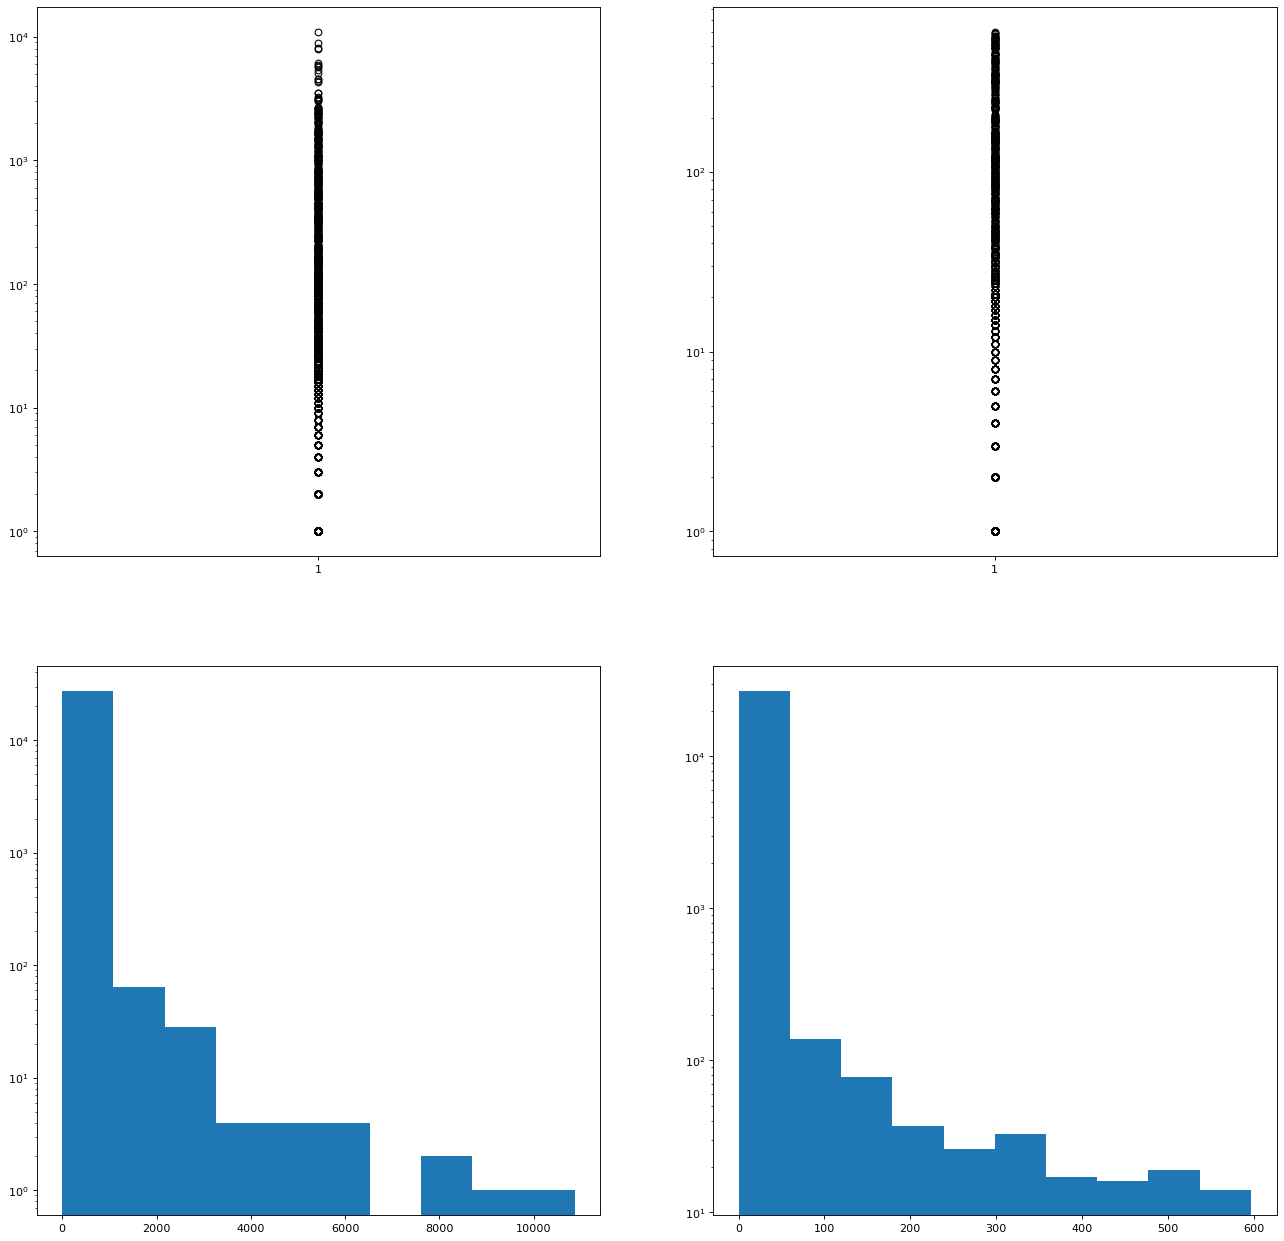

In [297]:
plot_outliers(df["SERVICE_1_COUNT"], True)

32


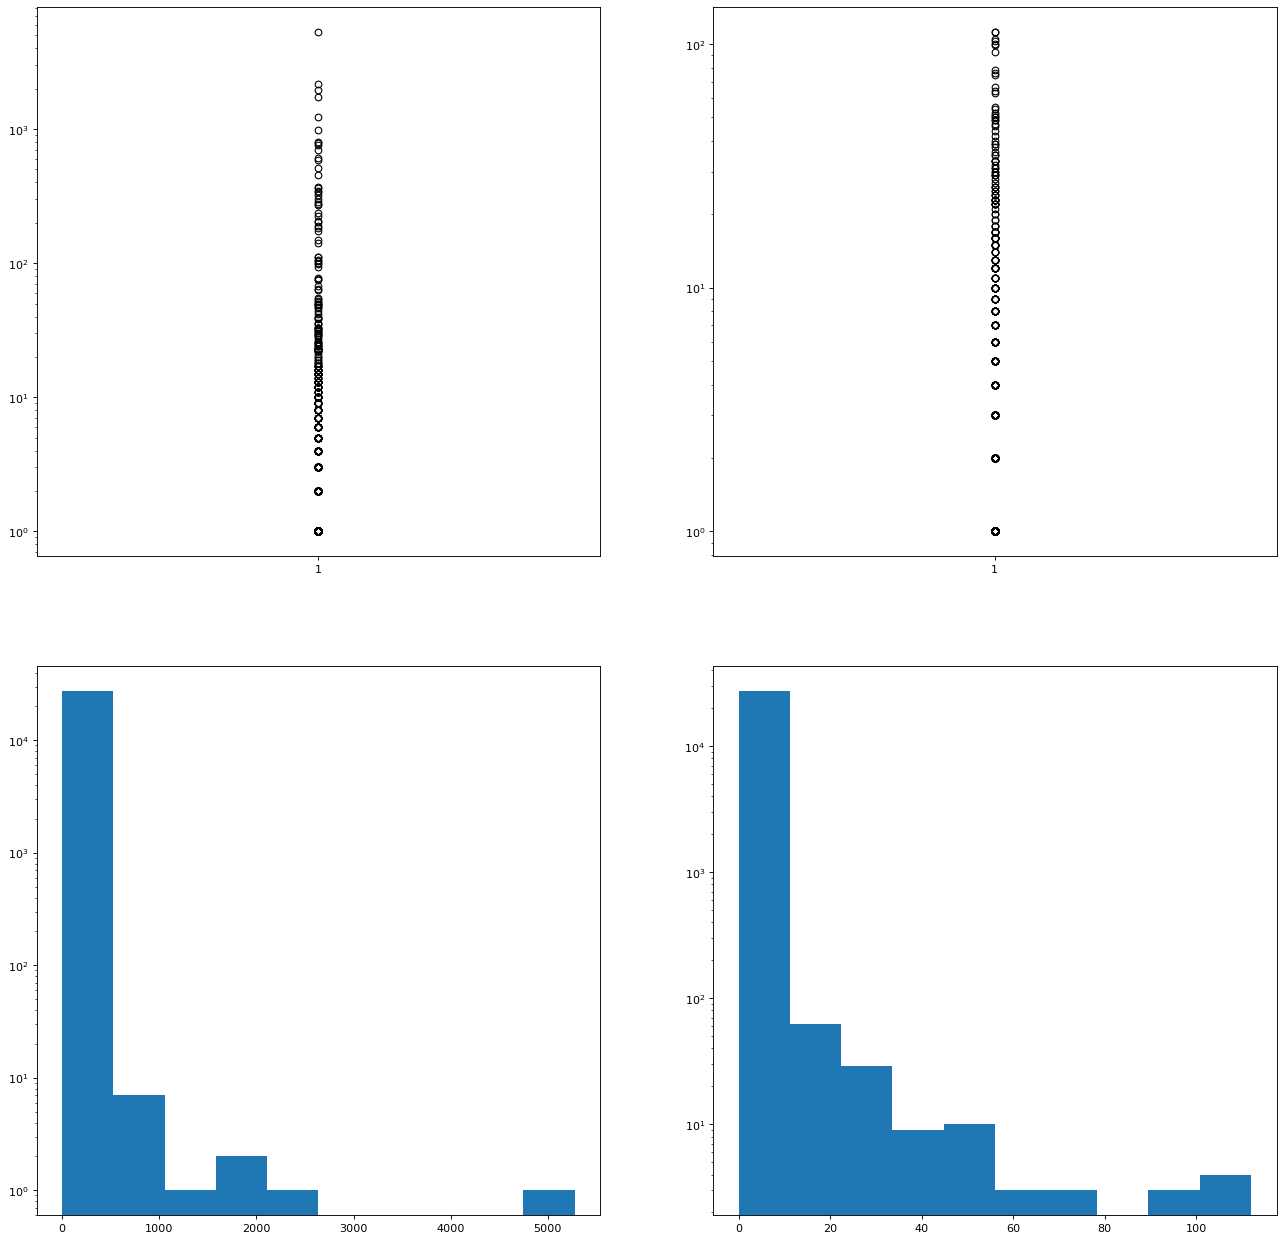

In [298]:
plot_outliers(df["SERVICE_2_COUNT"], True)


206


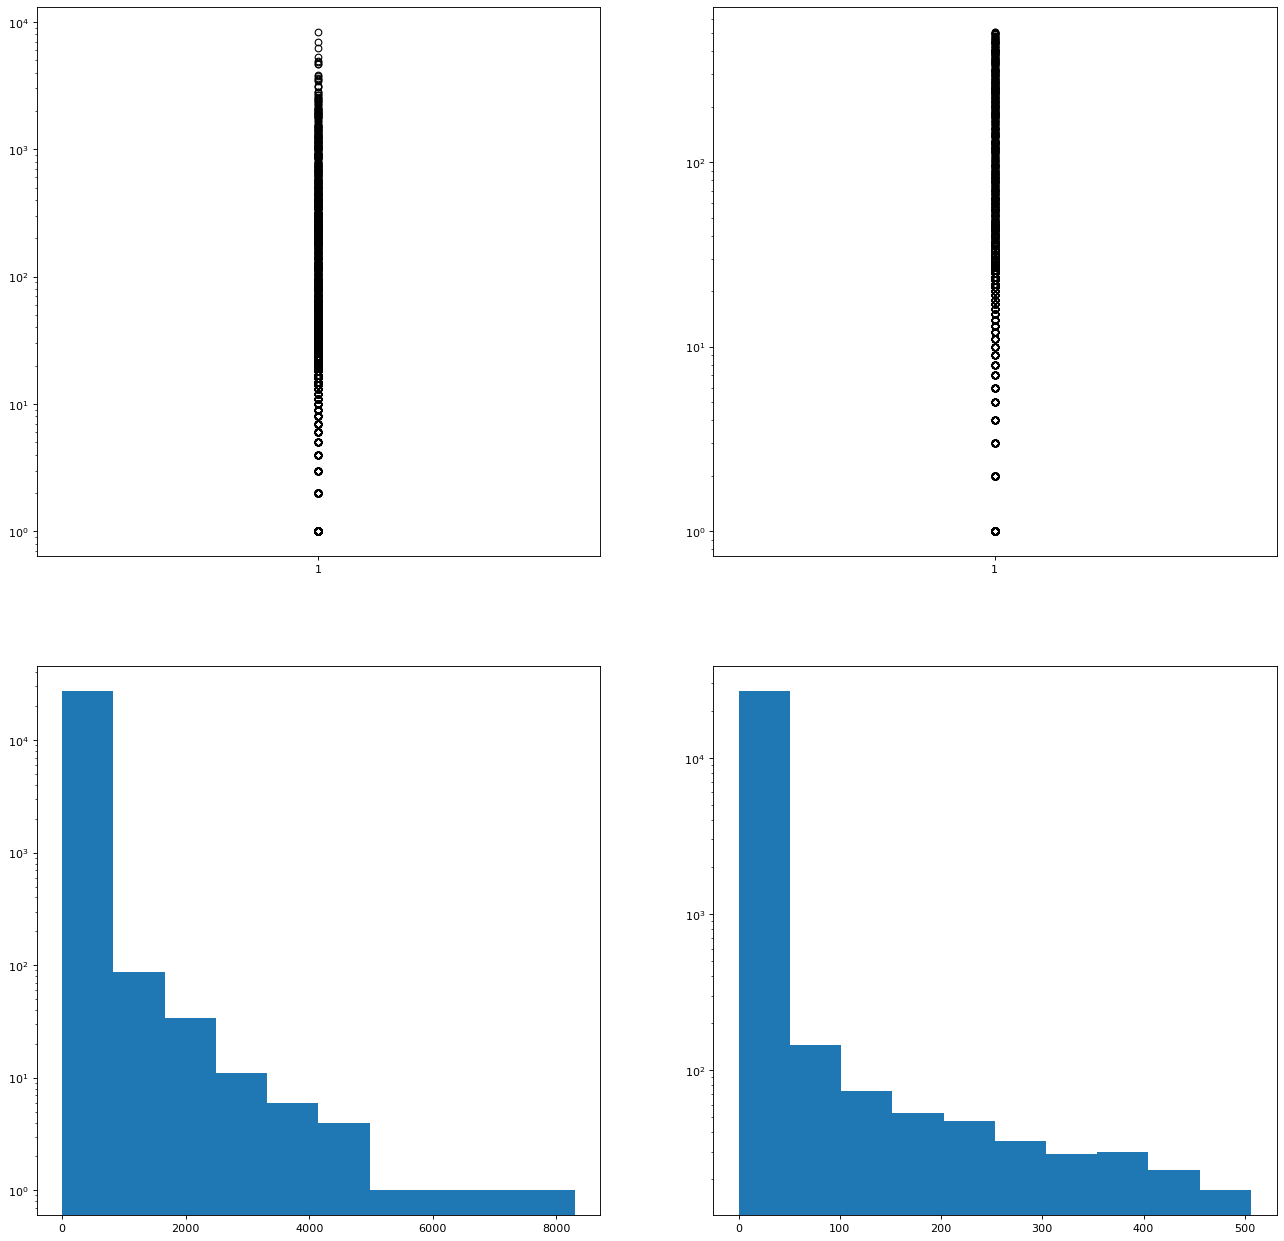

In [299]:
plot_outliers(df["SERVICE_3_COUNT"], True)


41


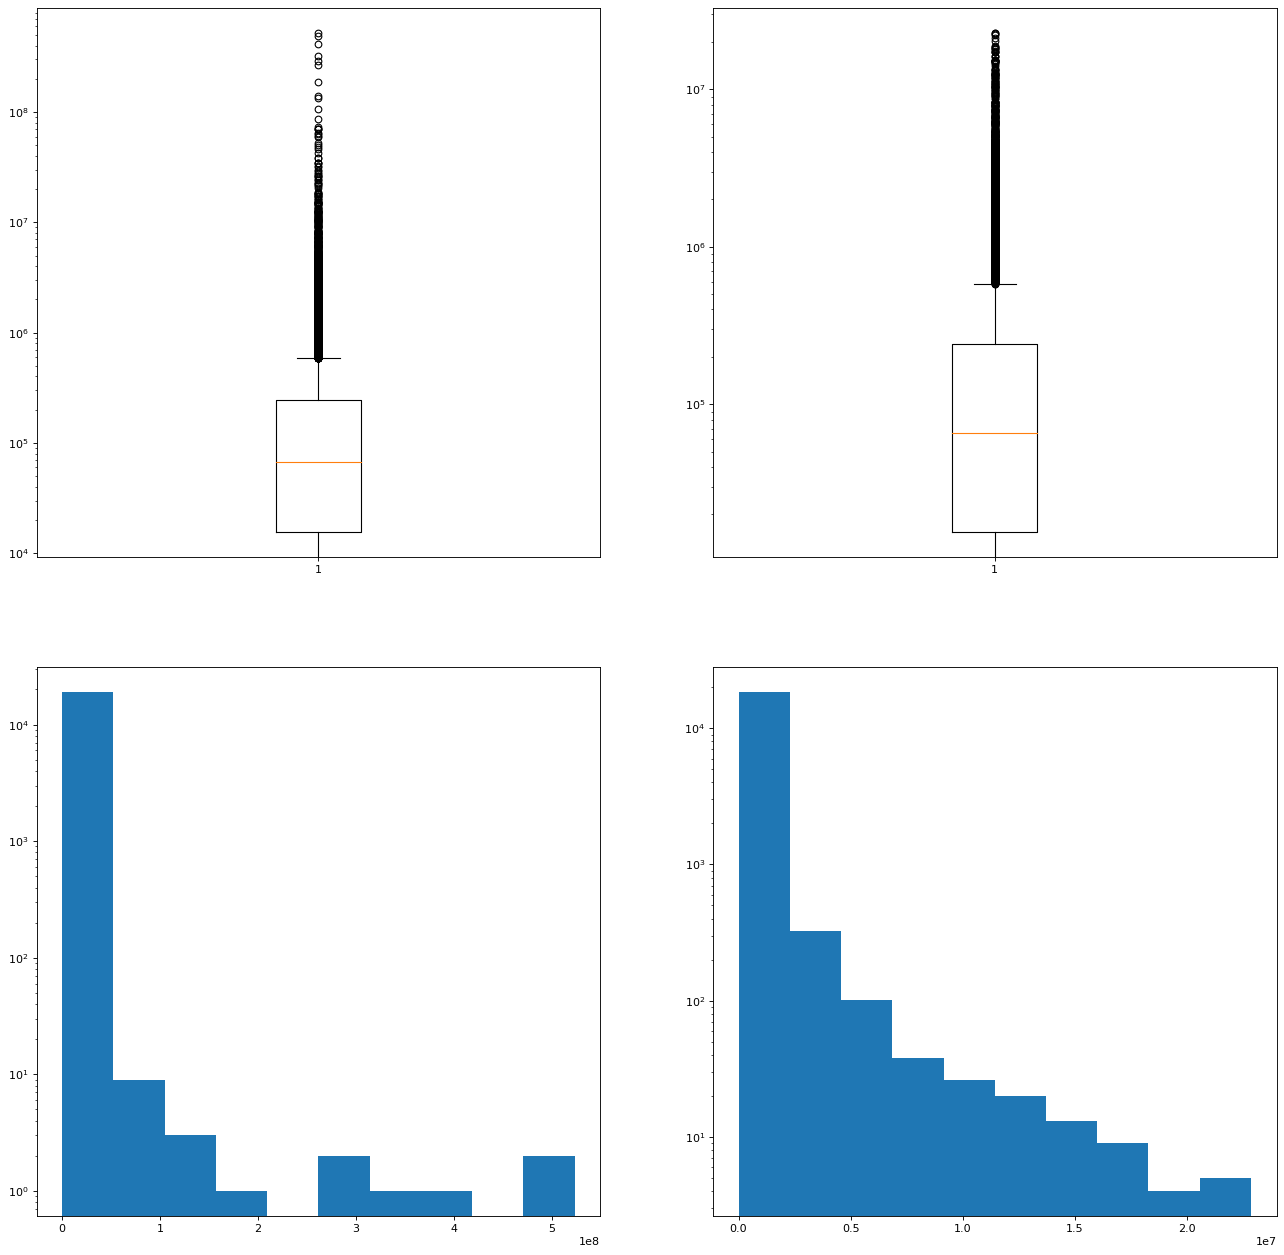

In [300]:
plot_outliers(df["GROSS_INCOME"], True)


In [301]:
df = df[
    ~detect_outliers(df["SERVICE_1_COUNT"]) &
    ~detect_outliers(df["SERVICE_2_COUNT"]) &
    ~detect_outliers(df["SERVICE_3_COUNT"]) &
    ~detect_outliers(df["SERVICE_2_TOTAL"]) &
    ~detect_outliers(df["GROSS_INCOME"])
    ]
print(len(df))

27037


Finally, to treat every feature equal, we scale numerical to a 0-1 range.

In [302]:
df["SERVICE_1_COUNT"] = (df["SERVICE_1_COUNT"] - df["SERVICE_1_COUNT"].min()) / df["SERVICE_1_COUNT"].max()
df["SERVICE_2_COUNT"] = (df["SERVICE_2_COUNT"] - df["SERVICE_2_COUNT"].min()) / df["SERVICE_2_COUNT"].max()
df["SERVICE_3_COUNT"] = (df["SERVICE_3_COUNT"] - df["SERVICE_3_COUNT"].min()) / df["SERVICE_3_COUNT"].max()
df["SERVICE_2_TOTAL"] = (df["SERVICE_2_TOTAL"] - df["SERVICE_2_TOTAL"].min()) / df["SERVICE_2_TOTAL"].max()
df["GROSS_INCOME"]    = (df["GROSS_INCOME"]    - df["GROSS_INCOME"].min())    / df["GROSS_INCOME"].max()

In [303]:
df.describe()

,CREATED_ON,LAST_LOGIN,SERVICE_X_DATE,PACKAGE_CHANGE_DATE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,SUPERUSER_LAST_LOGIN,ACCOUNTANT_ID,ACCOUNTANT_LAST_LOGIN,GROSS_INCOME,RATING_CODE
count,27037.000000,26869.000000,6915.000000,25892.000000,27033.000000,27033.000000,27033.000000,27033.000000,27037.000000,16465.000000,27037.000000,1026.000000,18785.000000,20322.000000
mean,0.503147,0.707451,0.451882,0.850036,0.004856,0.001301,0.017228,0.007223,0.608980,0.884214,0.037948,0.743640,0.015359,2.162927
std,0.181612,0.252264,0.206987,0.016657,0.045664,0.017231,0.073680,0.055347,0.487988,0.159668,0.191074,0.263524,0.050515,0.927454
min,0.000399,0.025763,0.025363,0.266637,0.000000,0.000000,0.000000,0.000000,0.000000,0.084202,0.000000,0.098718,0.000000,1.000000
25%,0.423739,0.505181,0.303306,0.847302,0.000000,0.000000,0.000000,0.000000,0.000000,0.832158,0.000000,0.527713,0.000683,1.000000
50%,0.499201,0.743599,0.394933,0.847302,0.000000,0.000000,0.000000,0.000000,1.000000,0.961765,0.000000,0.850956,0.002875,2.000000
75%,0.562899,0.963530,0.571033,0.847302,0.000000,0.000000,0.000000,0.000000,1.000000,0.996640,0.000000,0.982003,0.010641,3.000000
max,0.999743,0.999941,0.999301,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999945,1.000000,0.999897,1.000015,4.000000


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27037 entries, 0 to 27596
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CREATED_ON                    27037 non-null  float64
 1   LAST_LOGIN                    26869 non-null  float64
 2   SERVICE_X_DATE                6915 non-null   float64
 3   LINE_OF_BUSINESS              27037 non-null  object 
 4   SIZE_CODE                     27037 non-null  object 
 5   PACKAGE_TYPE                  27008 non-null  object 
 6   PREVIOUS_PACKAGE_TYPE         25892 non-null  object 
 7   PACKAGE_CHANGE_DATE           25892 non-null  float64
 8   SERVICE_1_COUNT               27033 non-null  float64
 9   SERVICE_2_COUNT               27033 non-null  float64
 10  SERVICE_2_TOTAL               27033 non-null  float64
 11  SERVICE_3_COUNT               27033 non-null  float64
 12  SUPERUSER_ID                  27037 non-null  float64
 13  S

In [305]:
df.head()

,CREATED_ON,LAST_LOGIN,SERVICE_X_DATE,LINE_OF_BUSINESS,SIZE_CODE,PACKAGE_TYPE,PREVIOUS_PACKAGE_TYPE,PACKAGE_CHANGE_DATE,SERVICE_1_COUNT,SERVICE_2_COUNT,SERVICE_2_TOTAL,SERVICE_3_COUNT,SUPERUSER_ID,SUPERUSER_LAST_LOGIN,ACCOUNTANT_ID,ACCOUNTANT_LAST_LOGIN,GROSS_INCOME,STATUS_CODE,RATING_CODE,CREATED_ON_ACTIVE,LAST_LOGIN_ACTIVE,SERVICE_X_DATE_ACTIVE,PACKAGE_CHANGE_DATE_ACTIVE,SUPERUSER_LAST_LOGIN_ACTIVE,ACCOUNTANT_LAST_LOGIN_ACTIVE,COUNTY
0,0.055954,0.055954,NaN,49414.0,91406695.0,Free_tier_0,Free_tier_0,0.847302,0.0,0.0,0.0,0.0,1.0,0.235848,0.0,NaN,0.004005,91406700.0,4.0,False,False,False,True,False,False,Főváros
1,0.056514,0.056514,NaN,nan,91406690.0,Free_tier_0,Free_tier_0,0.847302,0.0,0.0,0.0,0.0,1.0,0.450943,0.0,NaN,0.093252,91406700.0,1.0,False,False,False,True,False,False,Főváros
2,0.056538,0.056577,NaN,70224.0,91406692.0,Free_tier_0,Free_tier_0,0.847302,0.0,0.0,0.0,0.0,1.0,0.235848,0.0,NaN,0.001726,91406700.0,2.0,False,False,False,True,False,False,Főváros
3,0.058769,0.058771,NaN,81104.0,91406694.0,Free_tier_0,Free_tier_0,0.847302,0.0,0.0,0.0,0.0,1.0,0.235848,0.0,NaN,0.002651,91406700.0,1.0,False,False,False,True,False,False,Pest
4,0.058770,0.058772,NaN,46514.0,91406695.0,Free_tier_0,Free_tier_0,0.847302,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,91406713.0,NaN,False,False,False,True,False,False,Főváros


Still a lot of rows have missing values, but we might be able to get some good results with this data.

In [306]:
df.to_csv("../data/cleaned_missing_kept_outlier_removed.csv", index=False)